## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


C:\Users\benja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, max_in=0, min_in=0, flatten=True):
    for i in range(x.shape[0]):
        for j in range(x.shape[-1]):
            x[i,:,:,j] = x[i,:,:,j] / max(x[i,:,:,j].reshape(-1, 1))
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [20]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
print(x_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 128,256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])

In [27]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [28]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [29]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 222us/step - loss: 2.2525 - acc: 0.1437 - val_loss: 2.2235 - val_acc: 0.1646
Epoch 2/100
50000/50000 [==============================] - 10s 198us/step - loss: 2.1691 - acc: 0.1961 - val_loss: 2.2184 - val_acc: 0.1717
Epoch 3/100
50000/50000 [==============================] - 10s 196us/step - loss: 2.0506 - acc: 0.2532 - val_loss: 2.2634 - val_acc: 0.1669
Epoch 4/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.8770 - acc: 0.3290 - val_loss: 2.3668 - val_acc: 0.1610
Epoch 5/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.6586 - acc: 0.4169 - val_loss: 2.6370 - val_acc: 0.1570
Epoch 6/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.4315 - acc: 0.5039 - val_loss: 2.8510 - val_acc: 0.1503
Epoch 7/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.2321 - acc: 0.5801 - val_l

50000/50000 [==============================] - 10s 194us/step - loss: 0.3871 - acc: 0.8561 - val_loss: 6.7909 - val_acc: 0.1481
Epoch 60/100
50000/50000 [==============================] - 10s 200us/step - loss: 0.3793 - acc: 0.8578 - val_loss: 6.7907 - val_acc: 0.1525
Epoch 61/100
50000/50000 [==============================] - 10s 203us/step - loss: 0.3699 - acc: 0.8600 - val_loss: 7.2553 - val_acc: 0.1510
Epoch 62/100
50000/50000 [==============================] - 10s 196us/step - loss: 0.3637 - acc: 0.8608 - val_loss: 7.0791 - val_acc: 0.1546
Epoch 63/100
50000/50000 [==============================] - 9s 189us/step - loss: 0.3626 - acc: 0.8615 - val_loss: 7.0585 - val_acc: 0.1509
Epoch 64/100
50000/50000 [==============================] - 9s 190us/step - loss: 0.3713 - acc: 0.8605 - val_loss: 7.2000 - val_acc: 0.1528
Epoch 65/100
50000/50000 [==============================] - 10s 190us/step - loss: 0.3782 - acc: 0.8569 - val_loss: 7.1080 - val_acc: 0.1535
Epoch 66/100
50000/50000 [==

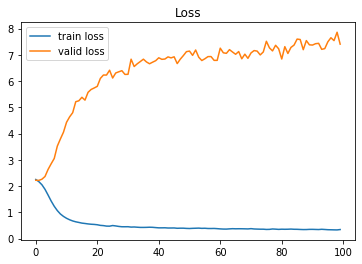

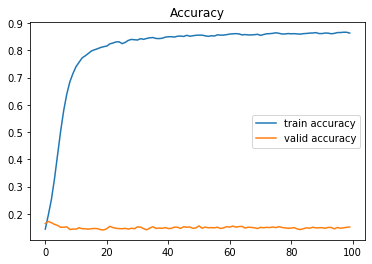

In [31]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
#validation loss從一開始就非常低 也就是從一開始就overfitt了